# Le couloir

### Partie 1 : Importations

On importe les algorithmes ainsi que les librairies utiles

In [1]:
# LES ALGORITHMES
from QLearning import *
from DQN import *

# POUR AFFICHAGE
import matplotlib.pyplot as plt
import seaborn as sns

# POUR ENVIRONNEMENT
import gym
from gym import spaces

### Partie 2 : Environnement LineWorld


Nous avons un couloir de taille n représenté par un array.
L'agent commence tout à gauche, et doit traverser le couloir pour arriver à droite.

Il peut soit se déplacer à gauche soit se déplacer à droite.
La solution optimale est de se déplacer vers la droite à chaque action.

In [2]:
class LineWorldEnv(gym.Env):
    def __init__(self, n_states=3):
        super(LineWorldEnv, self).__init__()
        self.n_states = n_states
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Discrete(n_states)
        self.state = 0

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 0 and self.state > 0:
            self.state -= 1
        elif action == 1 and self.state < self.n_states - 1:
            self.state += 1
        done = self.state == self.n_states - 1
        reward = 10 if done else -1
        return self.state, reward, done, {}

    def render(self, mode="human"):
        print("État actuel :", self.state)
    
    def seed(self, seedInt) :
        # environnement deterministe, methode necessaire pour stablebaseline
        pass

## Observations

### 1. Optimisation de QLearning

On s'intéresse à quelques paramètres du QLearning : epsilon, learningRate (alpha) et gamma
- epsilon représente la probabilité d'exploiter
- Au plus le learningRate est élevé, au plus les observations ont du poids par rapport à ce que l'agent sait déjà
- Au plus le gamma est élevé, au plus ce qui arrive dans le long terme est considéré important

(On peut avoir quelques intuitions sur les effets de ces paramètres, un gamma très faible peut pousser à des actions court-termiste par exemple)

Vous trouverez ci-dessous des observations sur les performances du QLearning pour les paramètres suivants :
- gamma dans {0.9, 0.98, 1.02, 1.1}
- epsilon dans {0.1, 0.2, 0.3, 0.5, 0.7}
- learningRate dans {0.01, 0.05, 0.1, 0.15}

Pour des couloirs de taille : {5, 10, 15, 20}

Comme nous connaissons, le comportement optimal, nous pouvons en déduire la récompense maximale obtensible.
Dans les affichages suivants, la récompense maximale est matérialisée par l'axe des abscisses, atteindre cet axe c'est se comporter de façon optimale.

In [23]:
"""FONCTIONS D'AIDE"""

def construct_all_possibilities(gamma_possibilities, eps_possibilities, lr_possibilities) :
    n = len(eps_possibilities)
    m = len(lr_possibilities)
    k = len(gamma_possibilities)

    data = []
    for z in range(k) :
        for y in range(n) :
            for x in range(m) :
                data.append((gamma_possibilities[z], eps_possibilities[y], lr_possibilities[x], x, y, z))
    return data


def plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps) :
    data = construct_all_possibilities(gamma_possibilities, eps_possibilities, lr_possibilities)
    n = len(eps_possibilities)
    m = len(lr_possibilities)
    k = len(gamma_possibilities)

    fig, axes = plt.subplots(m * k, n, figsize=(80, 80))
    
    for gamma, epsilon, alpha, x, y, z in data :
        env = LineWorldEnv(size)
    
        QTable, QRewards = train_q_learning(env, timesteps = timesteps, useProdForReward = True)
    
        axes[x+z*m, y].plot([r - (12 - size) for r in QRewards])
        axes[x+z*m, y].set_xlabel("Épisode")
        axes[x+z*m, y].set_ylabel("Récompense")
        axes[x+z*m, y].set_title(f"Récompense par épisode pour alpha = {alpha}, epsilon = {epsilon}, gamma = {gamma}")
        axes[x+z*m, y].grid()
        axes[x+z*m, y].set_xlim([0, 200])
        axes[x+z*m, y].set_ylim([-60, 5])
    plt.savefig(f"QLearning_Corridor{size}.png", bbox_inches='tight')
    plt.show()

### 1.1 Optimisation epsilon et learningRate et gamma pour couloir de taille 5

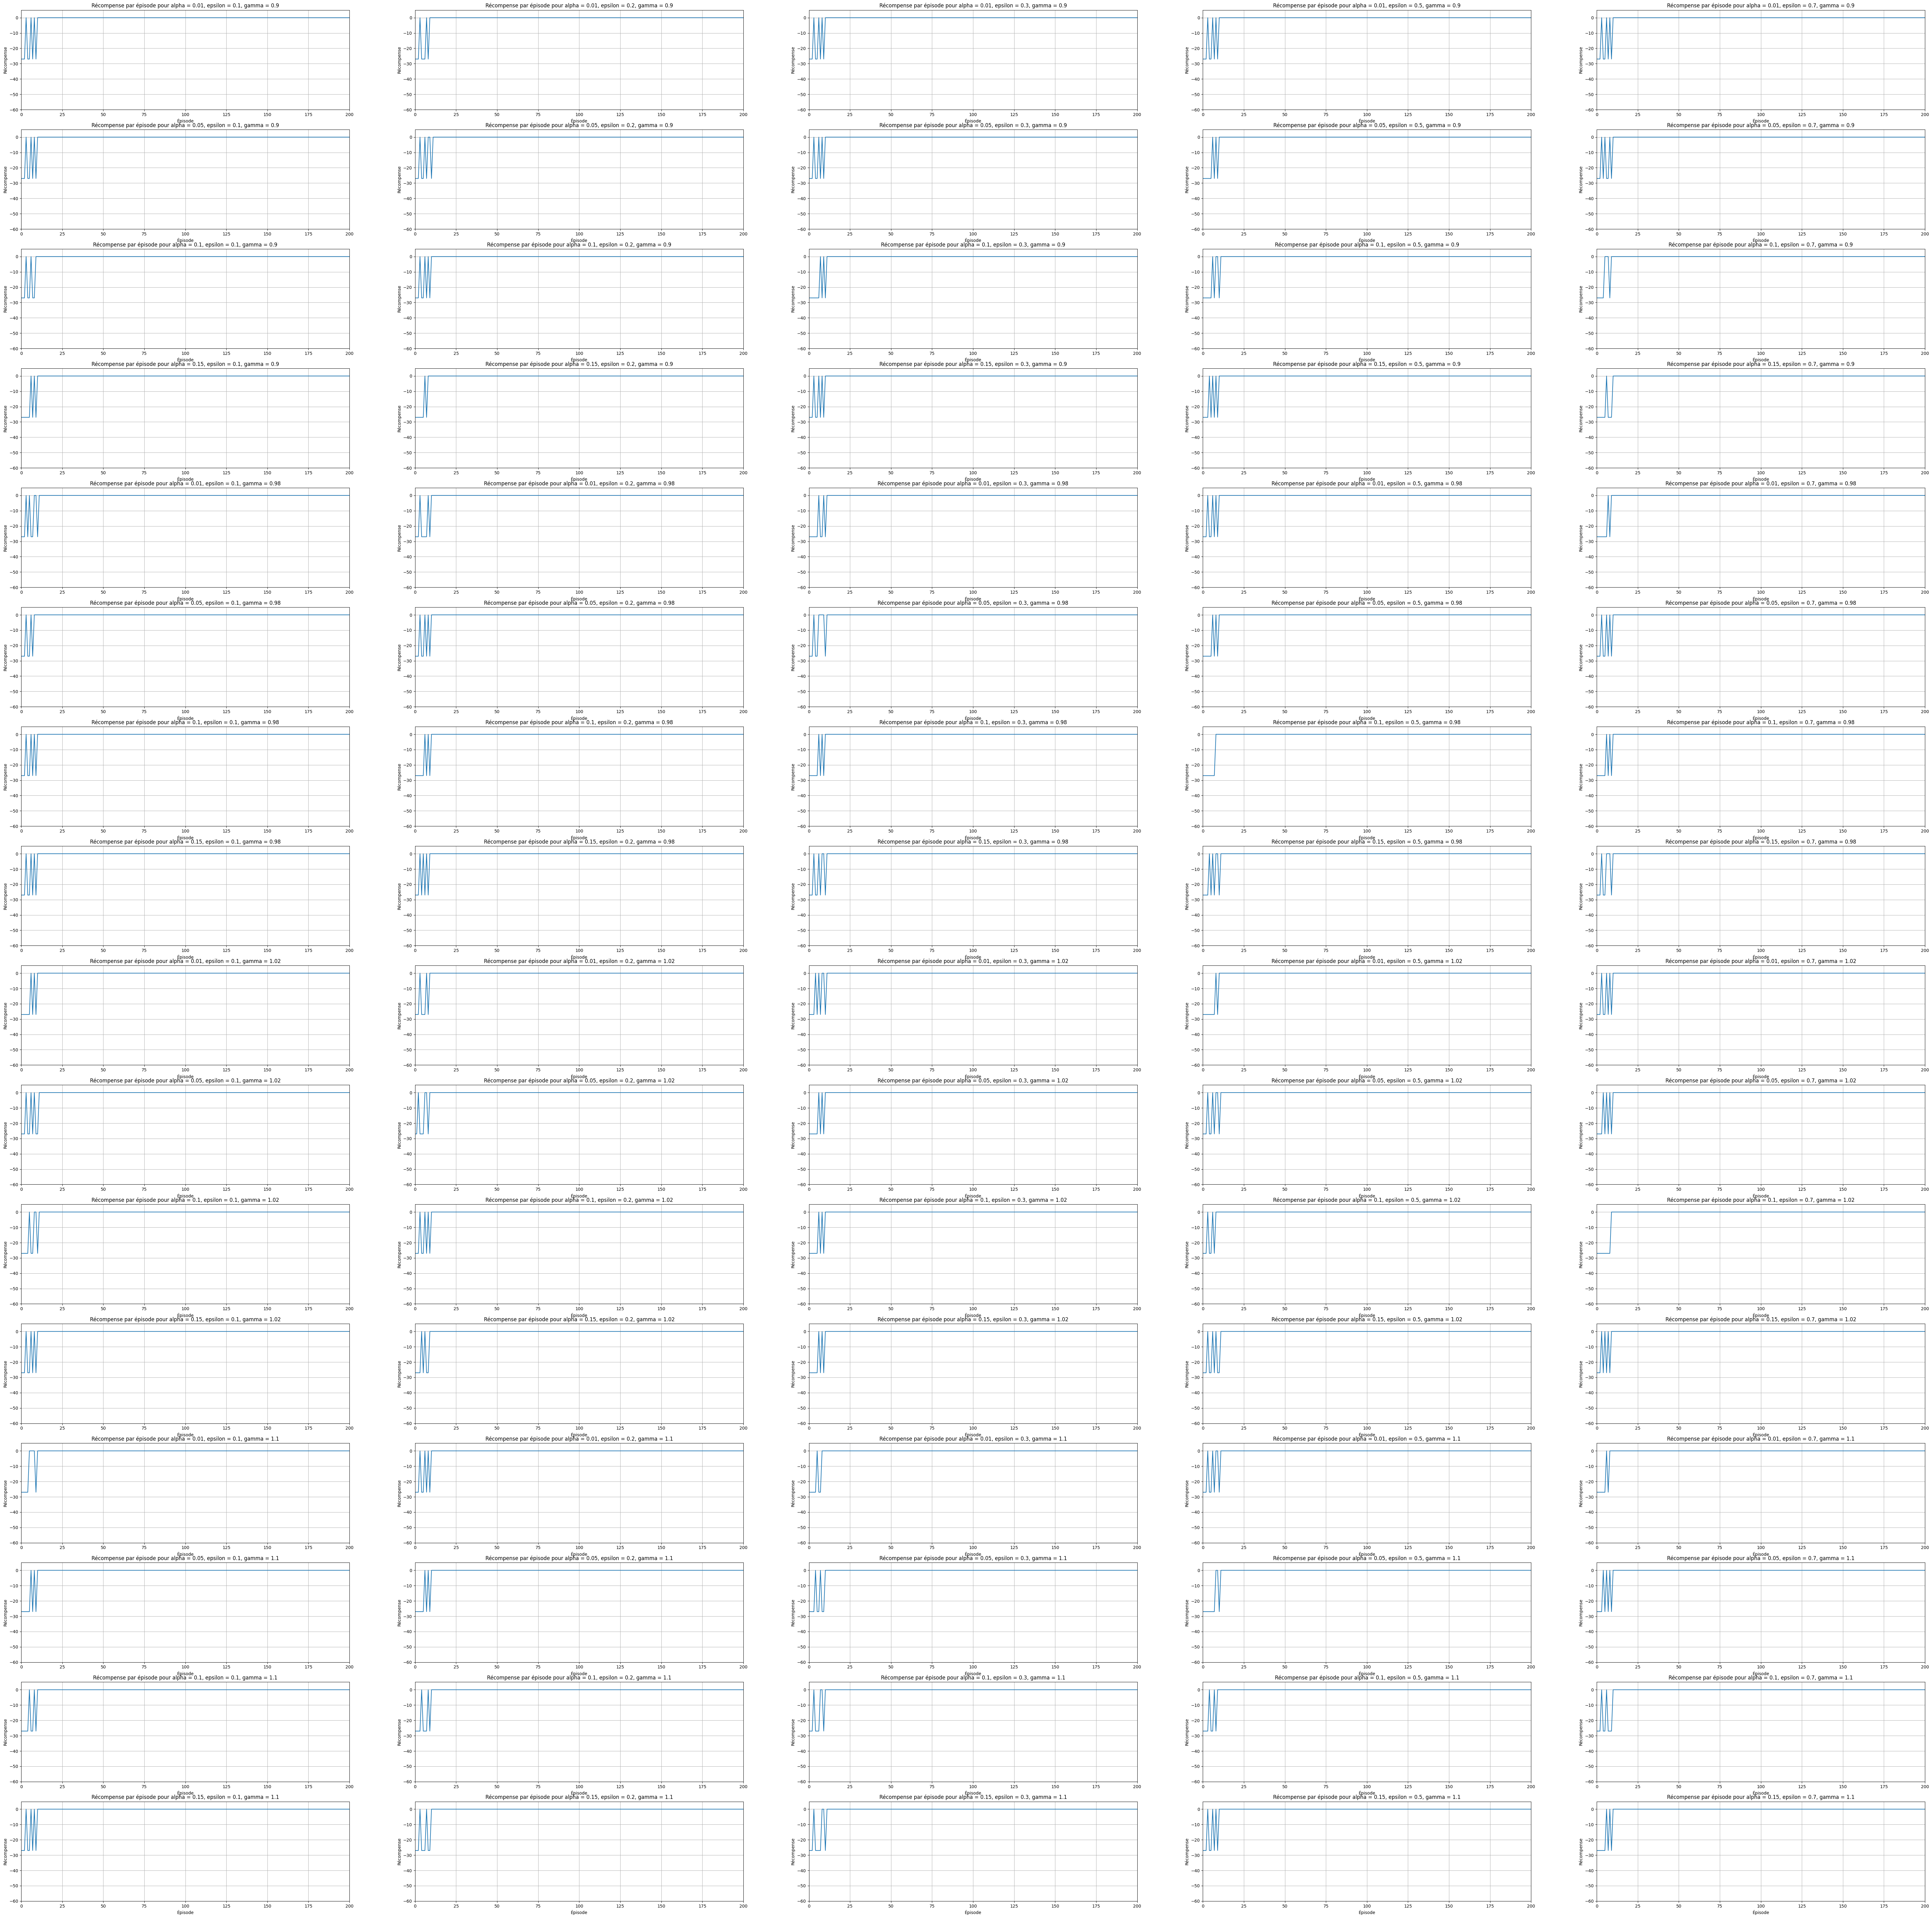

In [24]:

size = 5
timesteps = 1000

# Construct all possibilities
gamma_possibilities = [0.9, 0.98, 1.02, 1.1]
eps_possibilities = [0.1, 0.2, 0.3, 0.5, 0.7]
lr_possibilities = [0.01, 0.05, 0.1, 0.15]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps)

On remarque que l'axe des abscisses est rapidement atteint par l'ensemble des cas (au plus 10 épisodes), ce problème est donc suffisamment simple pour observer une convergence du comportement de l'agent vers le comportement optimal quelque soit les paramètres choisis (parmis ceux étudiés).

Les quelques variations visibles sont dues au hasard, (puisque dans certains cas l'exploration mène immédiatement au comportement optimal)

### 1.2 Optimisation epsilon et learningRate et gamma pour couloir de taille 10

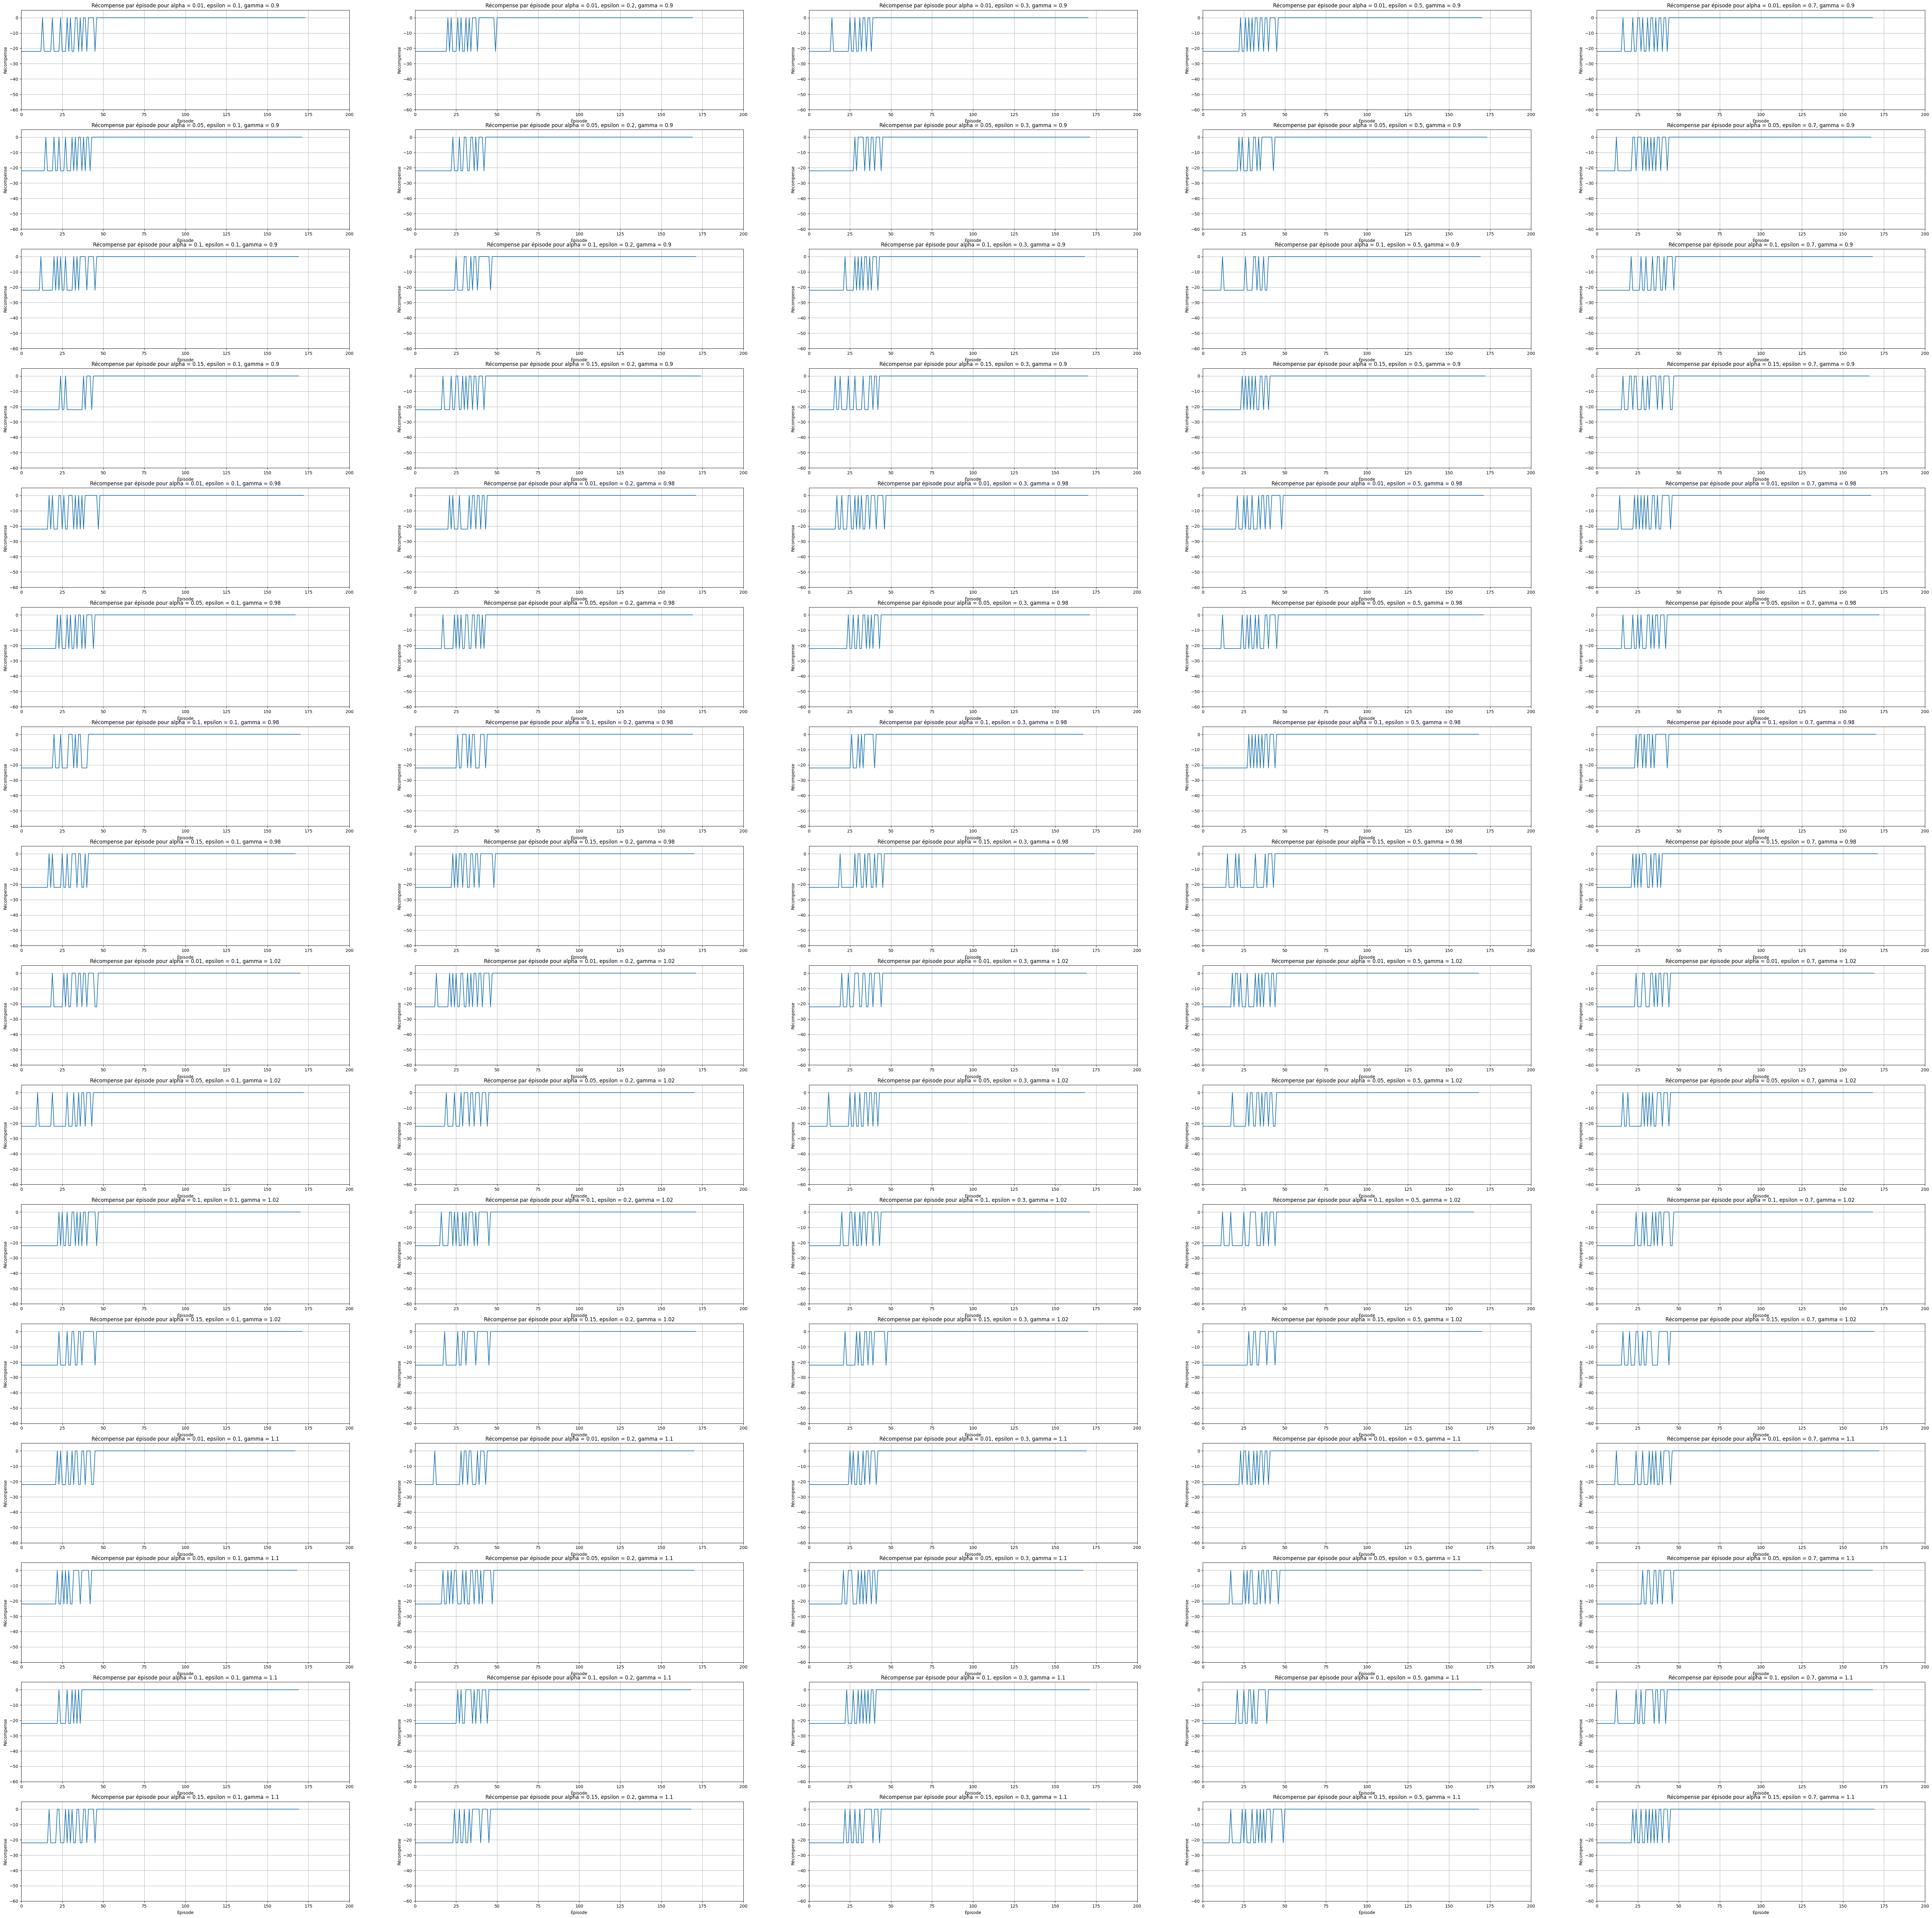

In [25]:

size = 10
timesteps = 2000

# Construct all possibilities
gamma_possibilities = [0.9, 0.98, 1.02, 1.1]
eps_possibilities = [0.1, 0.2, 0.3, 0.5, 0.7]
lr_possibilities = [0.01, 0.05, 0.1, 0.15]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps)

En doublant la taille du couloir, nous observons que le nombre d'épisodes avant convergence vers le résultat optimal a été multiplié par 4.
Pour l'ensemble des paramètres testés, les résultats sont similaires : convergence aux alentours de l'épisode 40.

### 1.3 Optimisation epsilon et learningRate et gamma pour couloir de taille 15

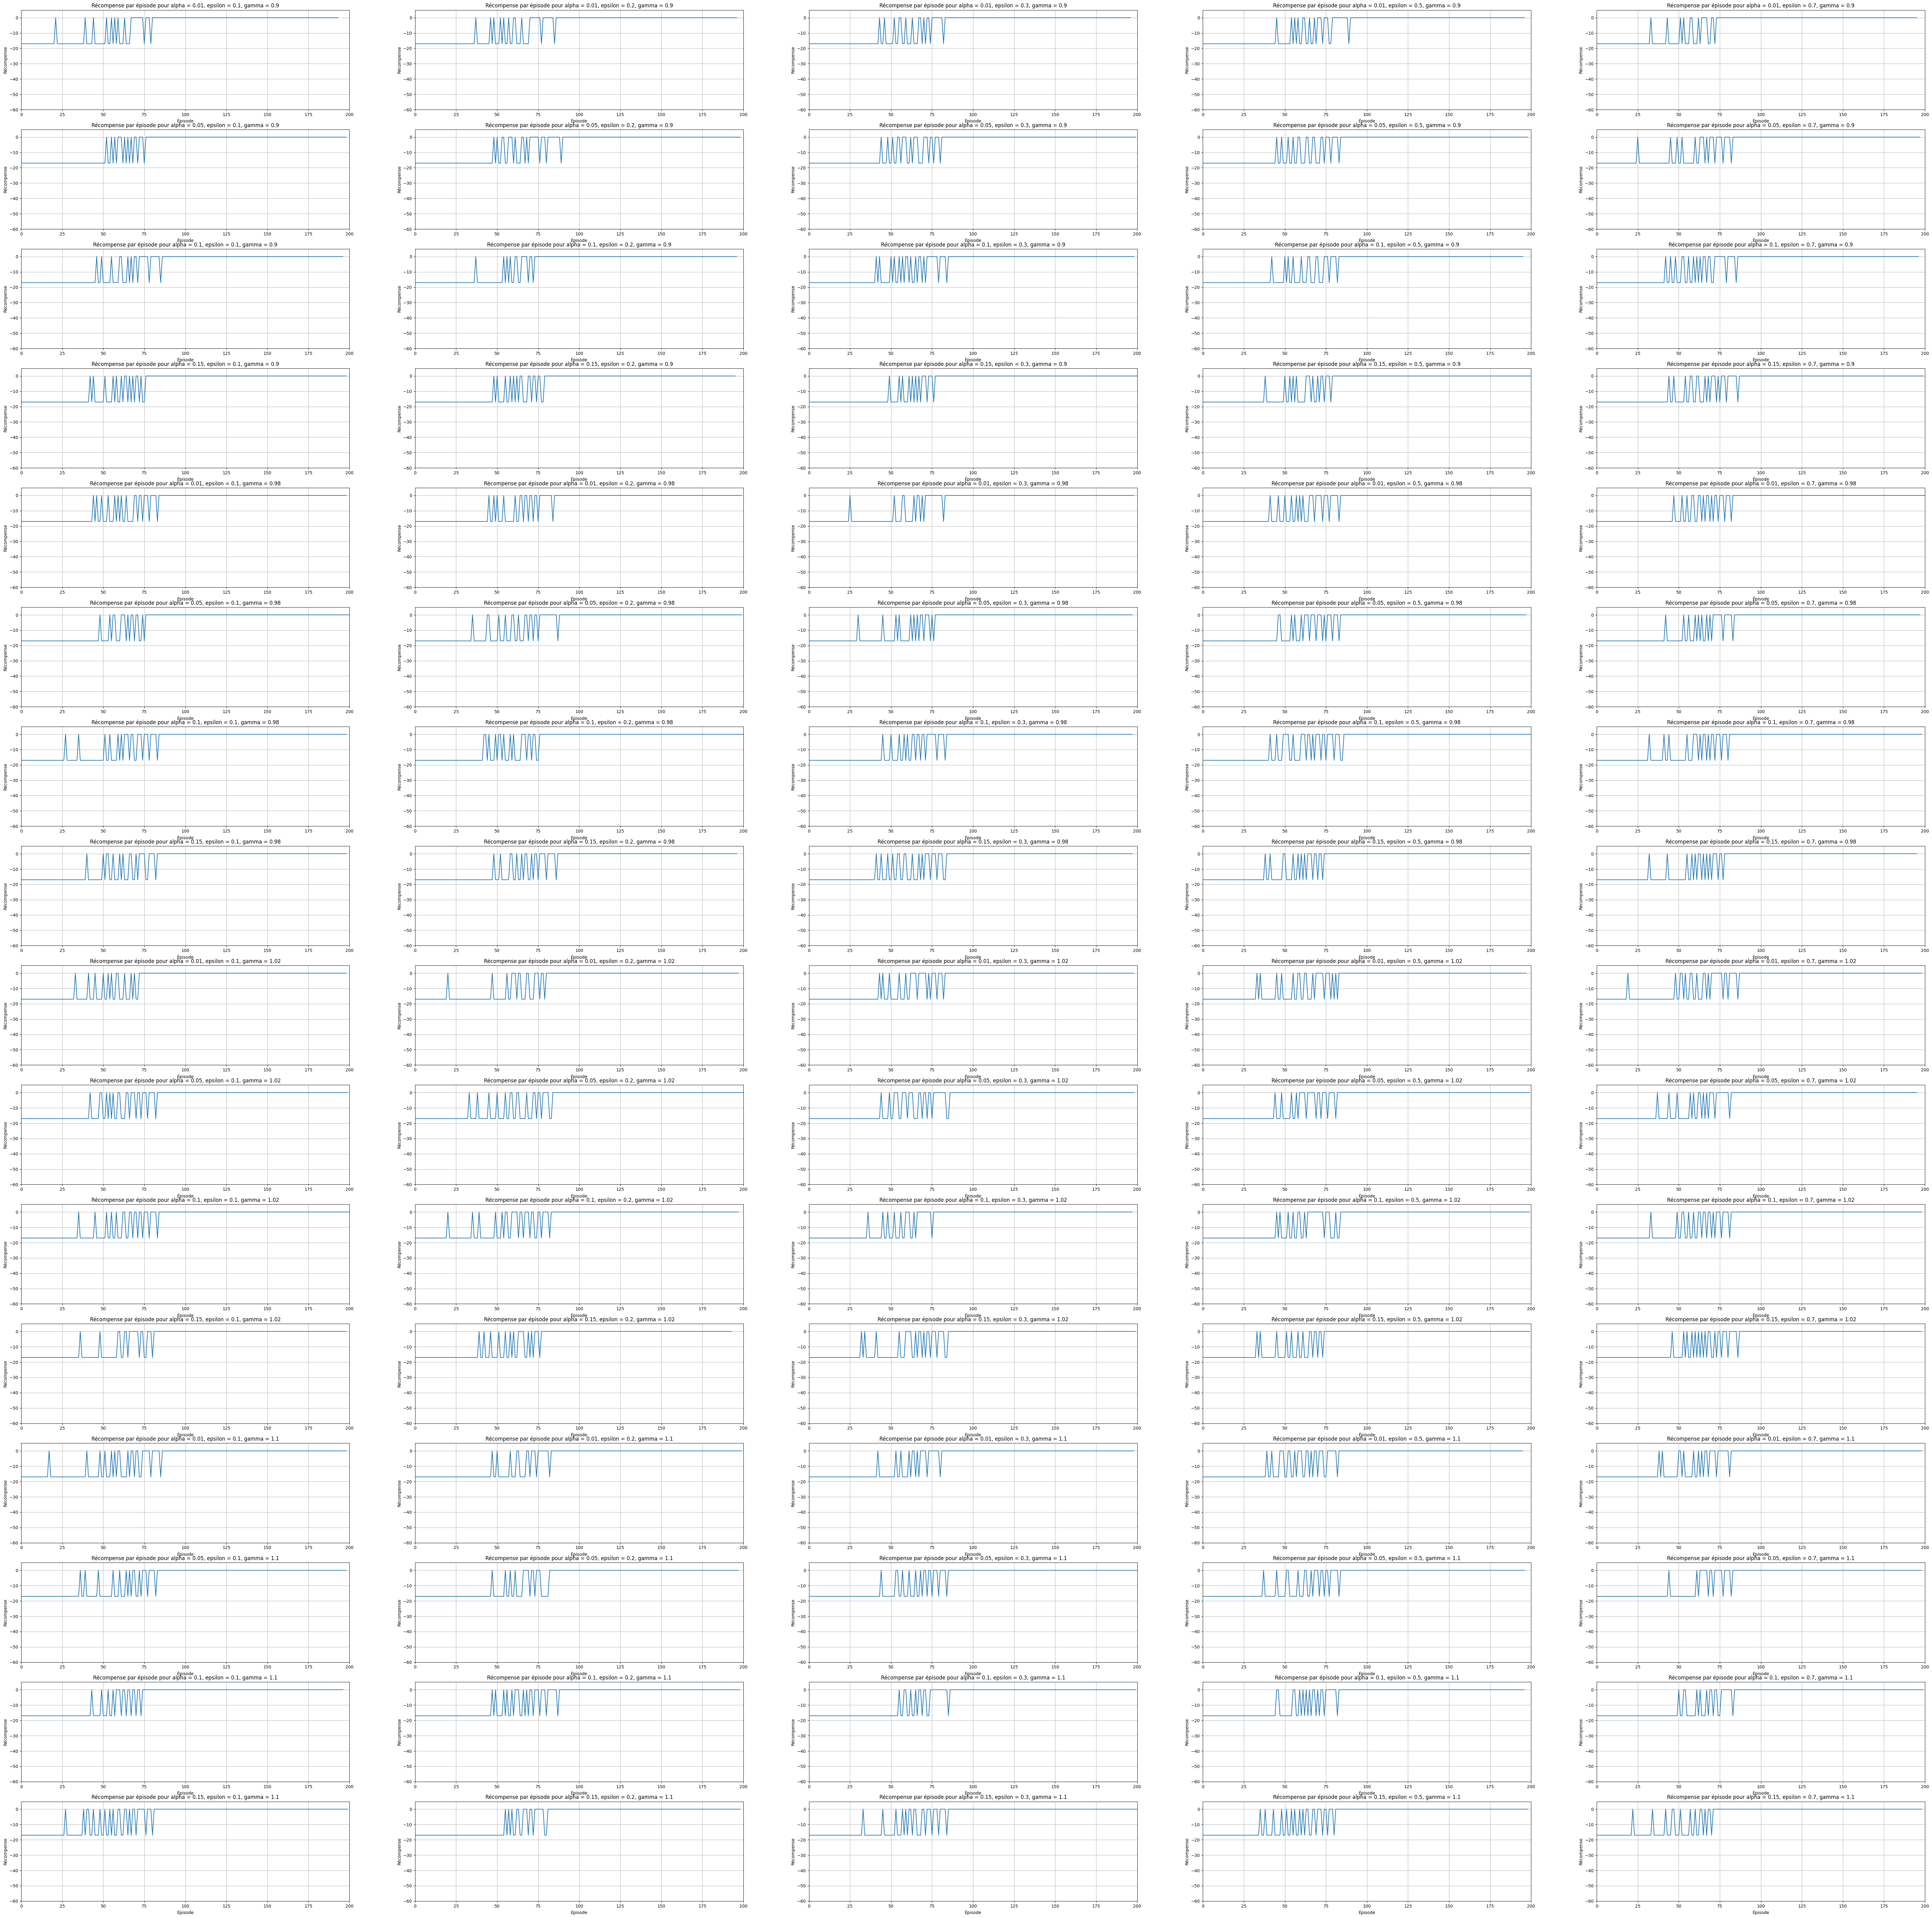

In [27]:

size = 15
timesteps = 4000

# Construct all possibilities
gamma_possibilities = [0.9, 0.98, 1.02, 1.1]
eps_possibilities = [0.1, 0.2, 0.3, 0.5, 0.7]
lr_possibilities = [0.01, 0.05, 0.1, 0.15]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps)

Les résultats se dégradent encore, on est obligé d'augmenter le nombre de timesteps (et donc le temps d'entraînement) avant de pouvoir observer la convergence vers le résultat optimal.
Pour toute combinaison de paramètre, la convergence a lieu aux alentours de l'épisode 70

### 1.4 Optimisation epsilon et learningRate et gamma pour couloir de taille 20

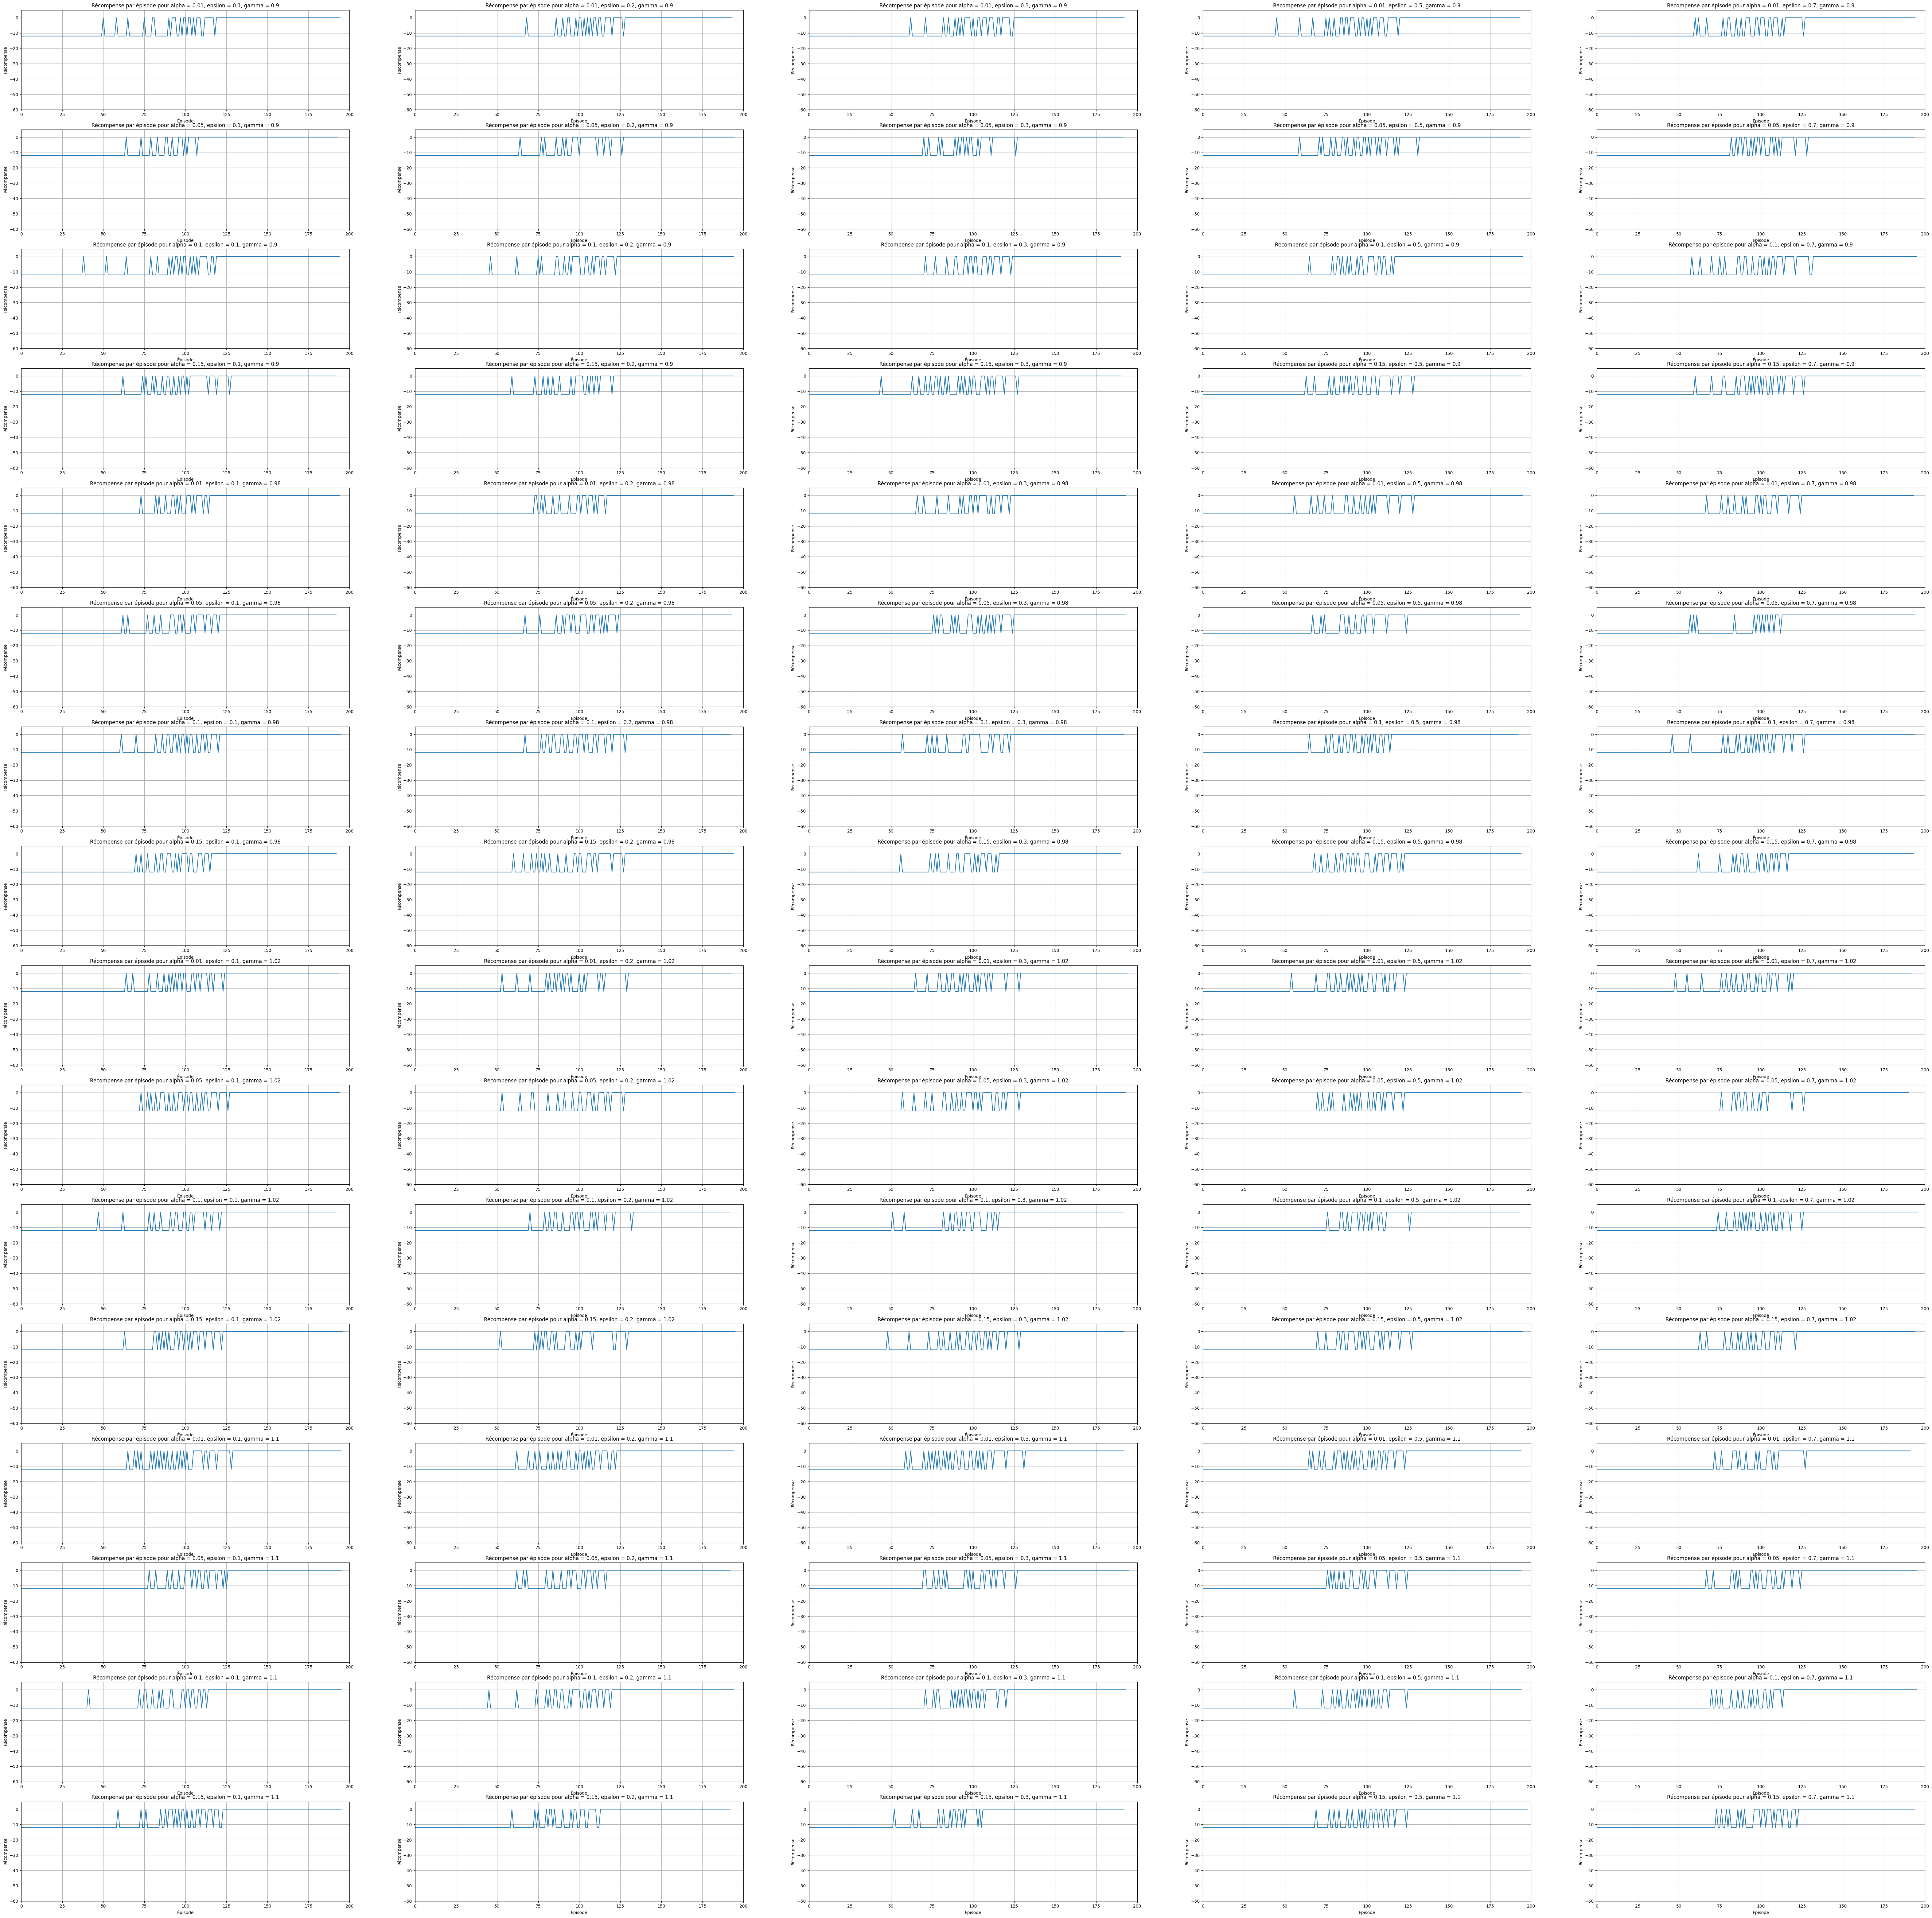

In [30]:

size = 20
timesteps = 6000

# Construct all possibilities
gamma_possibilities = [0.9, 0.98, 1.02, 1.1]
eps_possibilities = [0.1, 0.2, 0.3, 0.5, 0.7]
lr_possibilities = [0.01, 0.05, 0.1, 0.15]



plot_q_learning_performance_forAll(size, gamma_possibilities, eps_possibilities, lr_possibilities, timesteps = timesteps)

Pour l'ensemble des combinaisons de paramètres essayées, la convergence vers la solution optimale a lieue vers l'épisode 125.

### 1.5 Conclusion pour QLearning

Quelque soit les paramètres retenus parmis ceux testés, nous obtiendrons des résultats similaires.
Il est donc assez facile de régler correctement le QLearning pour ce problème.

### 2. Optimisation de DQN


### 3. Comparaison convergence vers solution optimale LineWorld entre QLearning et DQN

On sait que la récompense obtenue au bout du couloir est de 10
Et que pour tout autre action la récompense maximale est de 1

Ainsi la récompense optimale obtensible pour un couloir de taille n >= 3 est de 12-n


Nous pouvons afficher le point (12-taille_couloir) - recompense afin que l'axe des abscisses représente la récompense maximale obtensible pour l'environnement donné.

/home/enzo/Documents/Depots/jeux_iteres_part1/customEnv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/enzo/Documents/Depots/jeux_iteres_part1/customEnv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


KeyboardInterrupt: 

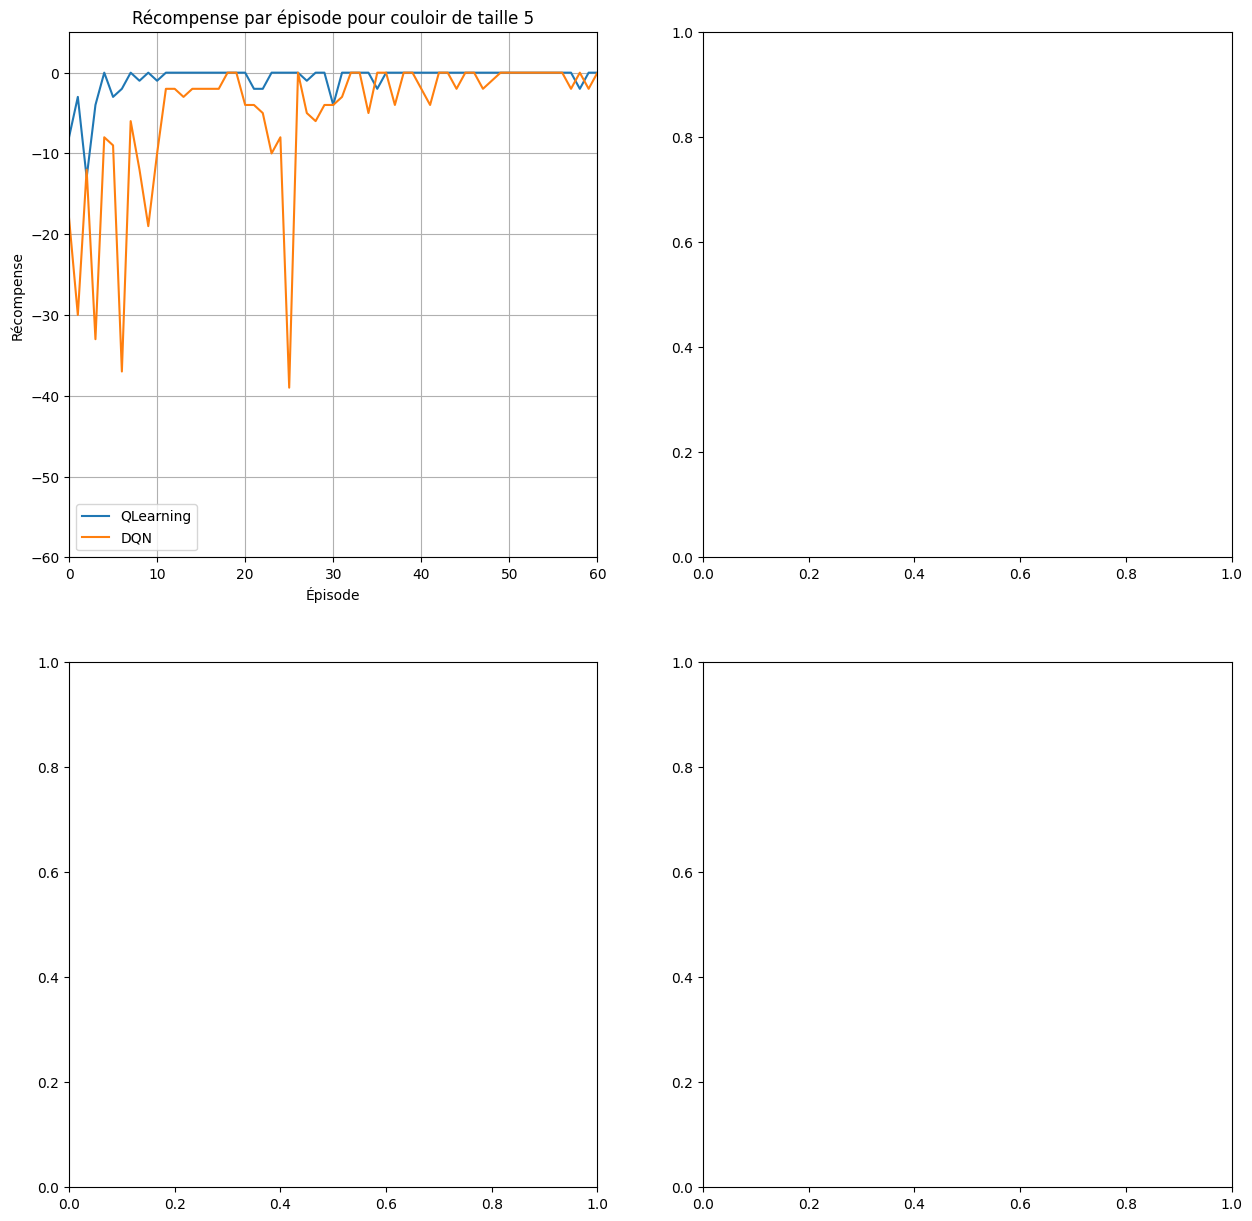

In [4]:

data = [(5, 0, 0), (10, 0, 1), (15, 1, 0), (20, 1, 1)]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

timesteps = 2000


for (n_states, x, y) in data :
    env = LineWorldEnv(n_states)
    
    DQNmodel, DQNrewards = train_dqn(env, timesteps = timesteps)
    QTable, QRewards = train_q_learning(env, timesteps = timesteps)
    
    
    axes[x, y].plot([r - (12-n_states) for r in QRewards], label='QLearning')
    axes[x, y].plot([r - (12-n_states) for r in DQNrewards], label='DQN')
    axes[x, y].set_xlim([0, 60])
    axes[x, y].set_ylim([-60, 5])
    axes[x, y].legend()
    axes[x, y].set_xlabel("Épisode")
    axes[x, y].set_ylabel("Récompense")
    axes[x, y].set_title(f"Récompense par épisode pour couloir de taille {n_states}")
    axes[x, y].grid()
plt.show()

Nous remarquons que la méthode tabulaire est plus efficace lorsque que le couloir est de taille limitée.
Néanmoins lorsque la taille du couloir grandit, la méthode (DQN) faisaint usage d'un réseau à la place d'un tableau (QLearning) semble plus adaptée.